# LOAN APPROVAL PREDICTION USING MACHINE LEARNING

IMPORTING THE LIBRARIES

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Importing & Loading the dataset

In [107]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("C:\\Users\\hp\\Downloads\\archive(18)\\loan.csv")

First 5 rows of the dataset

In [108]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Dataset Shape:

In [109]:
loan_dataset.shape

(614, 13)

Dataset Description:

In [110]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Dataset Information:

In [111]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset Column Names List:

In [112]:
 loan_dataset.columns.values.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

Handling Missing Values

In [113]:
loan_dataset.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [114]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now,fill the missing values of 'LoanAmount' using 'Interploalte' method

In [115]:
#loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].interpolate(method="linear",axis=0)

Now,fill the missing values of 'Gender'

In [11]:
#loan_dataset['Gender'] =loan_dataset['Gender'].fillna("Male")

Delete all the null Values

In [116]:
loan_dataset = loan_dataset.dropna()

Let's check the Missing values for the final time!

In [117]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Final Shape of the Dataset

In [118]:
loan_dataset.shape

(480, 13)

In [119]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [120]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Correct Data Format:

In [121]:
loan_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

As we can see above, some columns are not of the correct data type.
Numerical variable types = 'float' or 'int'

In [122]:
loan_dataset[["CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]] = loan_dataset[["CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]].astype(int)

In [123]:
loan_dataset.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status           int64
dtype: object

Exploratory Data Analysis

Analyze one by one variable

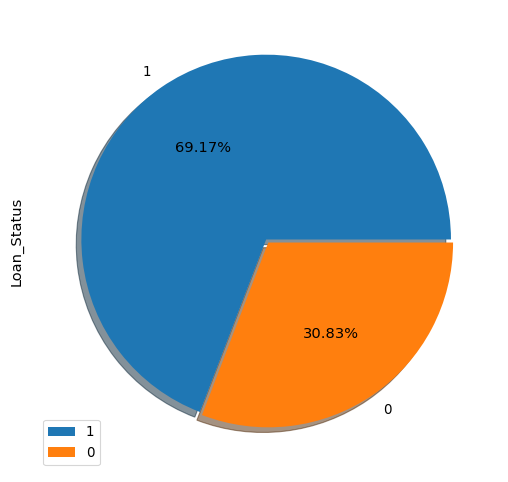

In [124]:
plt.figure(figsize=(6,6))
explode = [0.01,0.01]
loan_dataset["Loan_Status"].value_counts().plot(kind = "pie",autopct = "%0.2f%%",explode=explode,shadow=True)
plt.legend()
plt.show()

69.17% time Loan is getting Approved (Approval rate of getting loan is 68.04%)

In [125]:
loan_dataset["Loan_Status"].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

347 Peoples Loan were Approved and

163 Peoples Loan were Not Approved.

Comparison between Genders in getting the Loan:

Loan_Status    0    1
Gender               
Female        32   54
Male         116  278


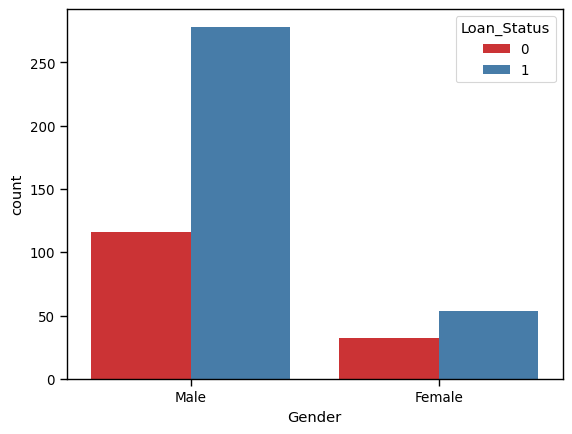

In [126]:
sns.countplot(data=loan_dataset,x='Gender',hue='Loan_Status',palette='Set1')
print(pd.crosstab(loan_dataset['Gender'],loan_dataset['Loan_Status']))

Here, we can see that the Males have more chances to get the Loan.

Comparison between Married Status in getting the Loan:

Loan_Status   0    1
Married             
No           64  105
Yes          84  227


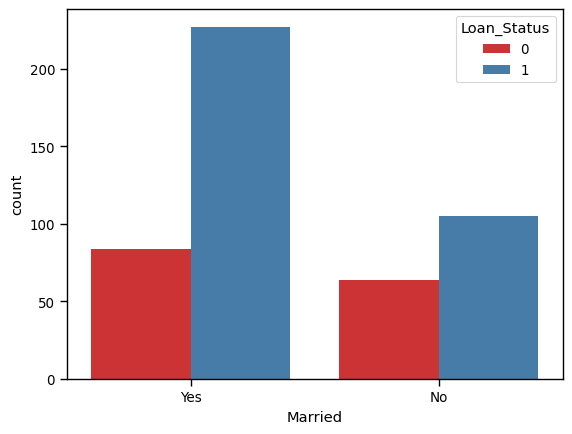

In [127]:
sns.countplot(data=loan_dataset,x='Married',hue='Loan_Status',palette='Set1')
print(pd.crosstab(loan_dataset['Married'],loan_dataset['Loan_Status']))

Here, we can see that the Married Person has more chance of getting the Loan.

Comparison between Education Status of an Individual in getting the Loan:

Loan_Status     0    1
Education             
Graduate      112  271
Not Graduate   36   61


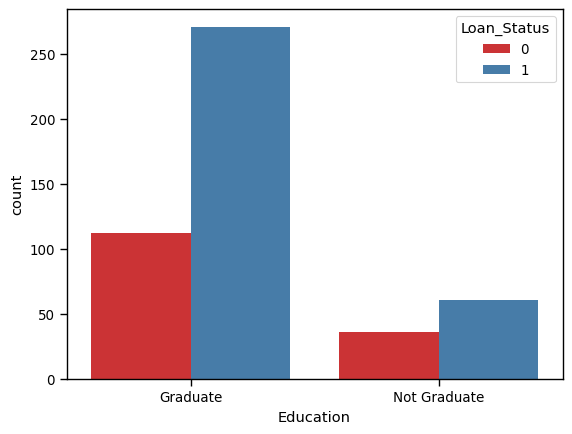

In [128]:
sns.countplot(data=loan_dataset,x='Education',hue='Loan_Status',palette='Set1')
print(pd.crosstab(loan_dataset['Education'],loan_dataset['Loan_Status']))

Here, we can see that a Graduate Individual has more chance of getting the Loan.

Comparison between Self-Employed or Not in getting the Loan:

Loan_Status      0    1
Self_Employed          
No             125  289
Yes             23   43


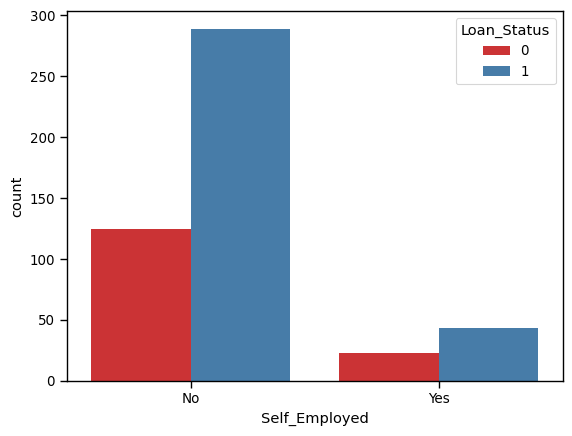

In [129]:
sns.countplot(data=loan_dataset,x='Self_Employed',hue='Loan_Status',palette='Set1')
print(pd.crosstab(loan_dataset['Self_Employed'],loan_dataset['Loan_Status']))

Here, we can see that not Self-Employed has more chance of getting the Loan.

Comparison between Property Area for getting the Loan:

Loan_Status     0    1
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98


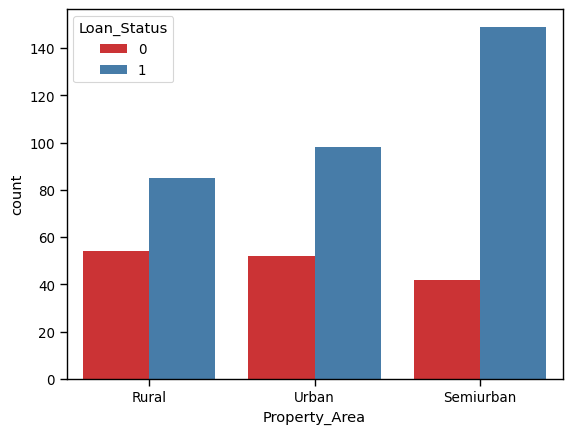

In [130]:
sns.countplot(data=loan_dataset,x='Property_Area',hue='Loan_Status',palette='Set1')
print(pd.crosstab(loan_dataset['Property_Area'],loan_dataset['Loan_Status']))


Here, we can see that People living in Semi-Urban Area have more chance to get the Loan.

Comparison between Dependants for getting the Loan:

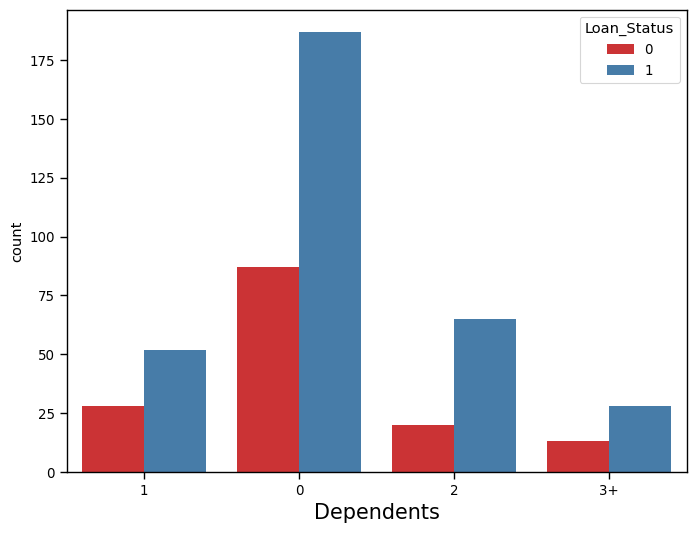

In [131]:
plt.figure(figsize = (8,6))
sns.countplot(data=loan_dataset,x='Dependents',hue='Loan_Status',palette='Set1')
plt.xlabel("Dependents",fontsize = 15)
plt.show()

Here, we can see that People whose dependant are equal to 0 have more chance to get the Loan

Let's see the approval rate of diffrent columns

In [132]:
loan_dataset['Loan_Status'].replace(1,'Y',inplace=True)
loan_dataset['Loan_Status'].replace(0,'N',inplace=True)

Gender (Loan Approval rate Gender wise)

In [133]:
pd.crosstab(loan_dataset["Gender"],loan_dataset["Loan_Status"])

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


In [134]:
x = pd.DataFrame(pd.crosstab(loan_dataset.Gender,loan_dataset.Loan_Status))

x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Gender,,,,
Female,32,54,86,62.790698
Male,116,278,394,70.558376


Result: If you are Male then there is a good chance of getting Loan Approved.(69% chance of getting Loan will Approved)

Married (Loan Approval rate Married wise)

In [135]:
pd.crosstab(loan_dataset["Married"],loan_dataset["Loan_Status"])

Loan_Status,N,Y
Married,,
No,64,105
Yes,84,227


In [136]:
x = pd.DataFrame(pd.crosstab(loan_dataset.Married,loan_dataset.Loan_Status))

x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x
   

Loan_Status,N,Y,Total,Approval_Rate
Married,,,,
No,64,105,169,62.130178
Yes,84,227,311,72.990354


Result: If you Married then there is a good chance of getting Loan Approved.(71% chance of getting Loan will Approved)

Dependents (Loan Approval rate Dependents wise)

In [137]:
pd.crosstab(loan_dataset["Dependents"],loan_dataset["Loan_Status"])

Loan_Status,N,Y
Dependents,,
0,87,187
1,28,52
2,20,65
3+,13,28


In [138]:
x = pd.DataFrame(pd.crosstab(loan_dataset.Dependents,loan_dataset.Loan_Status))

x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Dependents,,,,
0,87,187,274,68.248175
1,28,52,80,65.000000
2,20,65,85,76.470588
3+,13,28,41,68.292683


Result: We can see if you have 2 dependent then the Loan Approval Rate is 73%.(What Dependent 2 Indicates: He must be Married and has a one child. Approval Rate is High)

For 0 Dependent there is 67% Loan Approval Rate

For 1 Dependent there is 65% Loan Approval Rate

For 3+ Dependent there is 67% Loan Approval Rate

Education (Loan Approval rate Education wise)

In [139]:
pd.crosstab(loan_dataset["Education"],loan_dataset["Loan_Status"])

Loan_Status,N,Y
Education,,
Graduate,112,271
Not Graduate,36,61


In [140]:
x = pd.DataFrame(pd.crosstab(loan_dataset.Education,loan_dataset.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Education,,,,
Graduate,112,271,383,70.757180
Not Graduate,36,61,97,62.886598


Result: Graduate having the higher chance of getting Loan Approval.

Self Employed(Loan Approval rate Employment wise)

In [141]:
pd.crosstab(loan_dataset["Self_Employed"],loan_dataset["Loan_Status"])

Loan_Status,N,Y
Self_Employed,,
No,125,289
Yes,23,43


In [142]:

x = pd.DataFrame(pd.crosstab(loan_dataset.Self_Employed,loan_dataset.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Self_Employed,,,,
No,125,289,414,69.806763
Yes,23,43,66,65.151515


Result: not a self-employed having the higher chance of getting Loan Approval.

Property Area(Loan Approval rate Property Area wise)

In [143]:
pd.crosstab(loan_dataset["Property_Area"],loan_dataset["Loan_Status"])

Loan_Status,N,Y
Property_Area,,
Rural,54,85
Semiurban,42,149
Urban,52,98


In [144]:

x = pd.DataFrame(pd.crosstab(loan_dataset.Property_Area,loan_dataset.Loan_Status))
x["Total"] = x["Y"] + x["N"]
x["Approval_Rate"] = x["Y"]/x["Total"]*100
x

Loan_Status,N,Y,Total,Approval_Rate
Property_Area,,,,
Rural,54,85,139,61.151079
Semiurban,42,149,191,78.010471
Urban,52,98,150,65.333333


Result: Semi-Urban people have the higher chance of getting Loan Approval.

Find Approval Rate for,

Male Married

Male Not-Married

Female Married

Female Not-Married

                            Loan_ID
Gender Married Loan_Status         
Female No      N                 24
               Y                 37
       Yes     N                  8
               Y                 17
Male   No      N                 40
               Y                 68
       Yes     N                 76
               Y                210


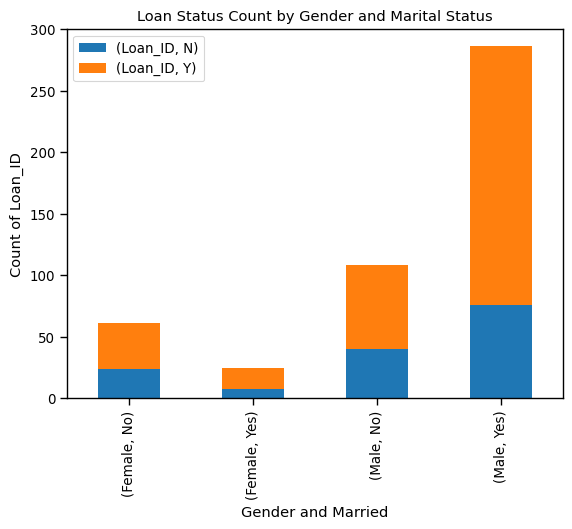

In [145]:
loan_dataset['Gender'].replace(1,'Male',inplace=True)
loan_dataset['Gender'].replace(0,'Female',inplace=True)
y = pd.DataFrame(loan_dataset.groupby(["Gender","Married","Loan_Status"])["Loan_ID"].count())
print(y)
y.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Gender and Married')
plt.ylabel('Count of Loan_ID')
plt.title('Loan Status Count by Gender and Marital Status')
plt.legend()
plt.show()

Result- It shows that if a person is Female and Not Married then it has higher chances of loan approval. and if a person is Male and Married then it has higher chances of loan approval.

In [146]:
y = pd.DataFrame(loan_dataset.groupby(["Gender","Married","Loan_Status"])["Loan_ID"].count()).reset_index()
y

y["Key"] = y["Gender"] + y["Married"] 
y

,Gender,Married,Loan_Status,Loan_ID,Key
0,Female,No,N,24,FemaleNo
1,Female,No,Y,37,FemaleNo
2,Female,Yes,N,8,FemaleYes
3,Female,Yes,Y,17,FemaleYes
4,Male,No,N,40,MaleNo
5,Male,No,Y,68,MaleNo
6,Male,Yes,N,76,MaleYes
7,Male,Yes,Y,210,MaleYes


In [147]:
z = pd.DataFrame(loan_dataset.groupby(["Gender","Married"])["Loan_ID"].count()).reset_index()
z

z["Key"] = z["Gender"] + z["Married"]
z

,Gender,Married,Loan_ID,Key
0,Female,No,61,FemaleNo
1,Female,Yes,25,FemaleYes
2,Male,No,108,MaleNo
3,Male,Yes,286,MaleYes


In [148]:
temp = pd.merge(y,z,on = "Key",how = "left")
temp

,Gender_x,Married_x,Loan_Status,Loan_ID_x,Key,Gender_y,Married_y,Loan_ID_y
0,Female,No,N,24,FemaleNo,Female,No,61
1,Female,No,Y,37,FemaleNo,Female,No,61
2,Female,Yes,N,8,FemaleYes,Female,Yes,25
3,Female,Yes,Y,17,FemaleYes,Female,Yes,25
4,Male,No,N,40,MaleNo,Male,No,108
5,Male,No,Y,68,MaleNo,Male,No,108
6,Male,Yes,N,76,MaleYes,Male,Yes,286
7,Male,Yes,Y,210,MaleYes,Male,Yes,286


In [149]:
temp["Approval_Rate"] = temp["Loan_ID_x"]/temp["Loan_ID_y"]

temp = temp[temp["Loan_Status"] == "Y"]

temp[["Gender_x","Married_x","Approval_Rate"]]

,Gender_x,Married_x,Approval_Rate
1,Female,No,0.606557
3,Female,Yes,0.680000
5,Male,No,0.629630
7,Male,Yes,0.734266


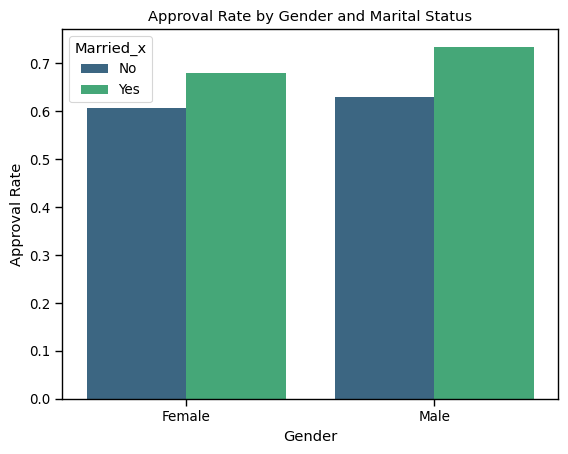

In [150]:
sns.barplot(x="Gender_x", y="Approval_Rate", hue="Married_x", data=temp,palette='viridis')
plt.title('Approval Rate by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Approval Rate')
plt.show()

Find Approval Rate w.r.t Education for,

Male Married

Male Not-Married

Female Married

Female Not-Married

In [151]:
loan_dataset['Education'].replace(1,'Graduate',inplace=True)
loan_dataset['Education'].replace(0,'Not Graduate',inplace=True)

y = pd.DataFrame(loan_dataset.groupby(["Gender","Married","Education","Loan_Status"])["Loan_ID"].count()).reset_index()
y

,Gender,Married,Education,Loan_Status,Loan_ID
0,Female,No,Graduate,N,21
1,Female,No,Graduate,Y,30
2,Female,No,Not Graduate,N,3
3,Female,No,Not Graduate,Y,7
4,Female,Yes,Graduate,N,7
5,Female,Yes,Graduate,Y,15
6,Female,Yes,Not Graduate,N,1
7,Female,Yes,Not Graduate,Y,2
8,Male,No,Graduate,N,31
9,Male,No,Graduate,Y,53


In [152]:
y["Key"] = y["Gender"] + y["Married"] + y["Education"]
y

,Gender,Married,Education,Loan_Status,Loan_ID,Key
0,Female,No,Graduate,N,21,FemaleNoGraduate
1,Female,No,Graduate,Y,30,FemaleNoGraduate
2,Female,No,Not Graduate,N,3,FemaleNoNot Graduate
3,Female,No,Not Graduate,Y,7,FemaleNoNot Graduate
4,Female,Yes,Graduate,N,7,FemaleYesGraduate
5,Female,Yes,Graduate,Y,15,FemaleYesGraduate
6,Female,Yes,Not Graduate,N,1,FemaleYesNot Graduate
7,Female,Yes,Not Graduate,Y,2,FemaleYesNot Graduate
8,Male,No,Graduate,N,31,MaleNoGraduate
9,Male,No,Graduate,Y,53,MaleNoGraduate


In [153]:
z = pd.DataFrame(loan_dataset.groupby(["Gender","Married","Education"])["Loan_ID"].count()).reset_index()
z

z["Key"] = z["Gender"] + z["Married"] + z["Education"]
z

,Gender,Married,Education,Loan_ID,Key
0,Female,No,Graduate,51,FemaleNoGraduate
1,Female,No,Not Graduate,10,FemaleNoNot Graduate
2,Female,Yes,Graduate,22,FemaleYesGraduate
3,Female,Yes,Not Graduate,3,FemaleYesNot Graduate
4,Male,No,Graduate,84,MaleNoGraduate
5,Male,No,Not Graduate,24,MaleNoNot Graduate
6,Male,Yes,Graduate,226,MaleYesGraduate
7,Male,Yes,Not Graduate,60,MaleYesNot Graduate


In [154]:
temp = pd.merge(y,z,on = "Key",how = "left")
temp

,Gender_x,Married_x,Education_x,Loan_Status,Loan_ID_x,Key,Gender_y,Married_y,Education_y,Loan_ID_y
0,Female,No,Graduate,N,21,FemaleNoGraduate,Female,No,Graduate,51
1,Female,No,Graduate,Y,30,FemaleNoGraduate,Female,No,Graduate,51
2,Female,No,Not Graduate,N,3,FemaleNoNot Graduate,Female,No,Not Graduate,10
3,Female,No,Not Graduate,Y,7,FemaleNoNot Graduate,Female,No,Not Graduate,10
4,Female,Yes,Graduate,N,7,FemaleYesGraduate,Female,Yes,Graduate,22
5,Female,Yes,Graduate,Y,15,FemaleYesGraduate,Female,Yes,Graduate,22
6,Female,Yes,Not Graduate,N,1,FemaleYesNot Graduate,Female,Yes,Not Graduate,3
7,Female,Yes,Not Graduate,Y,2,FemaleYesNot Graduate,Female,Yes,Not Graduate,3
8,Male,No,Graduate,N,31,MaleNoGraduate,Male,No,Graduate,84
9,Male,No,Graduate,Y,53,MaleNoGraduate,Male,No,Graduate,84


In [155]:
temp["Approval_Rate"] = temp["Loan_ID_x"]/temp["Loan_ID_y"]

temp = temp[temp["Loan_Status"] == "Y"]

temp[["Gender_x","Married_x","Education_x","Loan_ID_y","Approval_Rate"]]

,Gender_x,Married_x,Education_x,Loan_ID_y,Approval_Rate
1,Female,No,Graduate,51,0.588235
3,Female,No,Not Graduate,10,0.700000
5,Female,Yes,Graduate,22,0.681818
7,Female,Yes,Not Graduate,3,0.666667
9,Male,No,Graduate,84,0.630952
11,Male,No,Not Graduate,24,0.625000
13,Male,Yes,Graduate,226,0.765487
15,Male,Yes,Not Graduate,60,0.616667


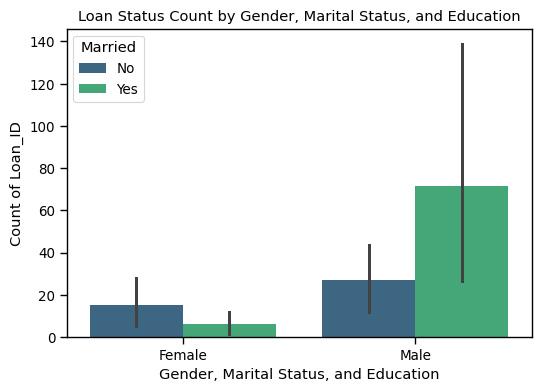

In [156]:
# Creating a bar plot using Seaborn
plt.figure(figsize=(6,4))

sns.barplot(x="Gender", y="Loan_ID", hue="Married", data=y, palette="viridis")
plt.title('Loan Status Count by Gender, Marital Status, and Education')
plt.xlabel('Gender, Marital Status, and Education')
plt.ylabel('Count of Loan_ID')

# Show the plot
plt.show()

Result-If a person is Female,Not Married and Educated then they have higher chance of getting loan approval
and if a person is Male ,Married and Educated then they have also higher chance of getting loan Approval 

Drop the column Loan ID because it is an independent variable

In [157]:
loan_dataset =loan_dataset.drop(columns=['Loan_ID'])

Display the Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

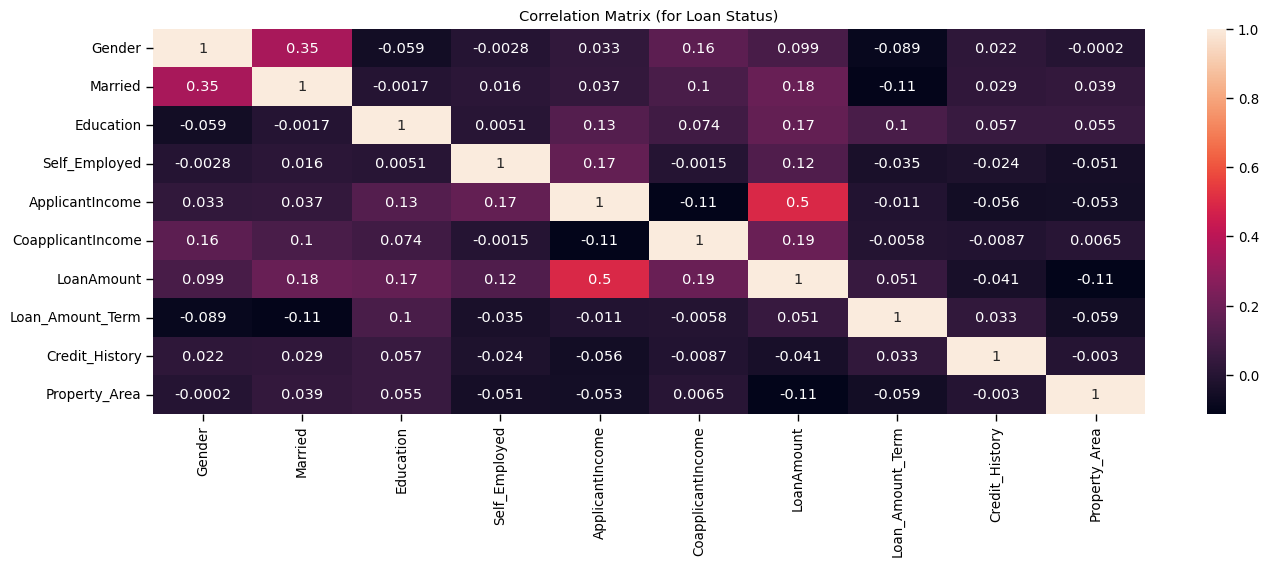

In [202]:
plt.figure(figsize=(16,5))
sns.heatmap(loan_dataset.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

From the above figure, we can see that Applicant Income (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Applicant Income.

Separate Categorical and Numerical Features

1. Categorical Columns

In [159]:
#show all categorical columns name
cat_col = [colm for colm in loan_dataset.columns if loan_dataset[colm].dtype == "O"]
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [160]:
loan_dataset[cat_col].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y


In [161]:
loan_dataset[cat_col].isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [162]:
Categorical = loan_dataset[cat_col]
Categorical.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y


In [163]:
Categorical.shape

(480, 7)

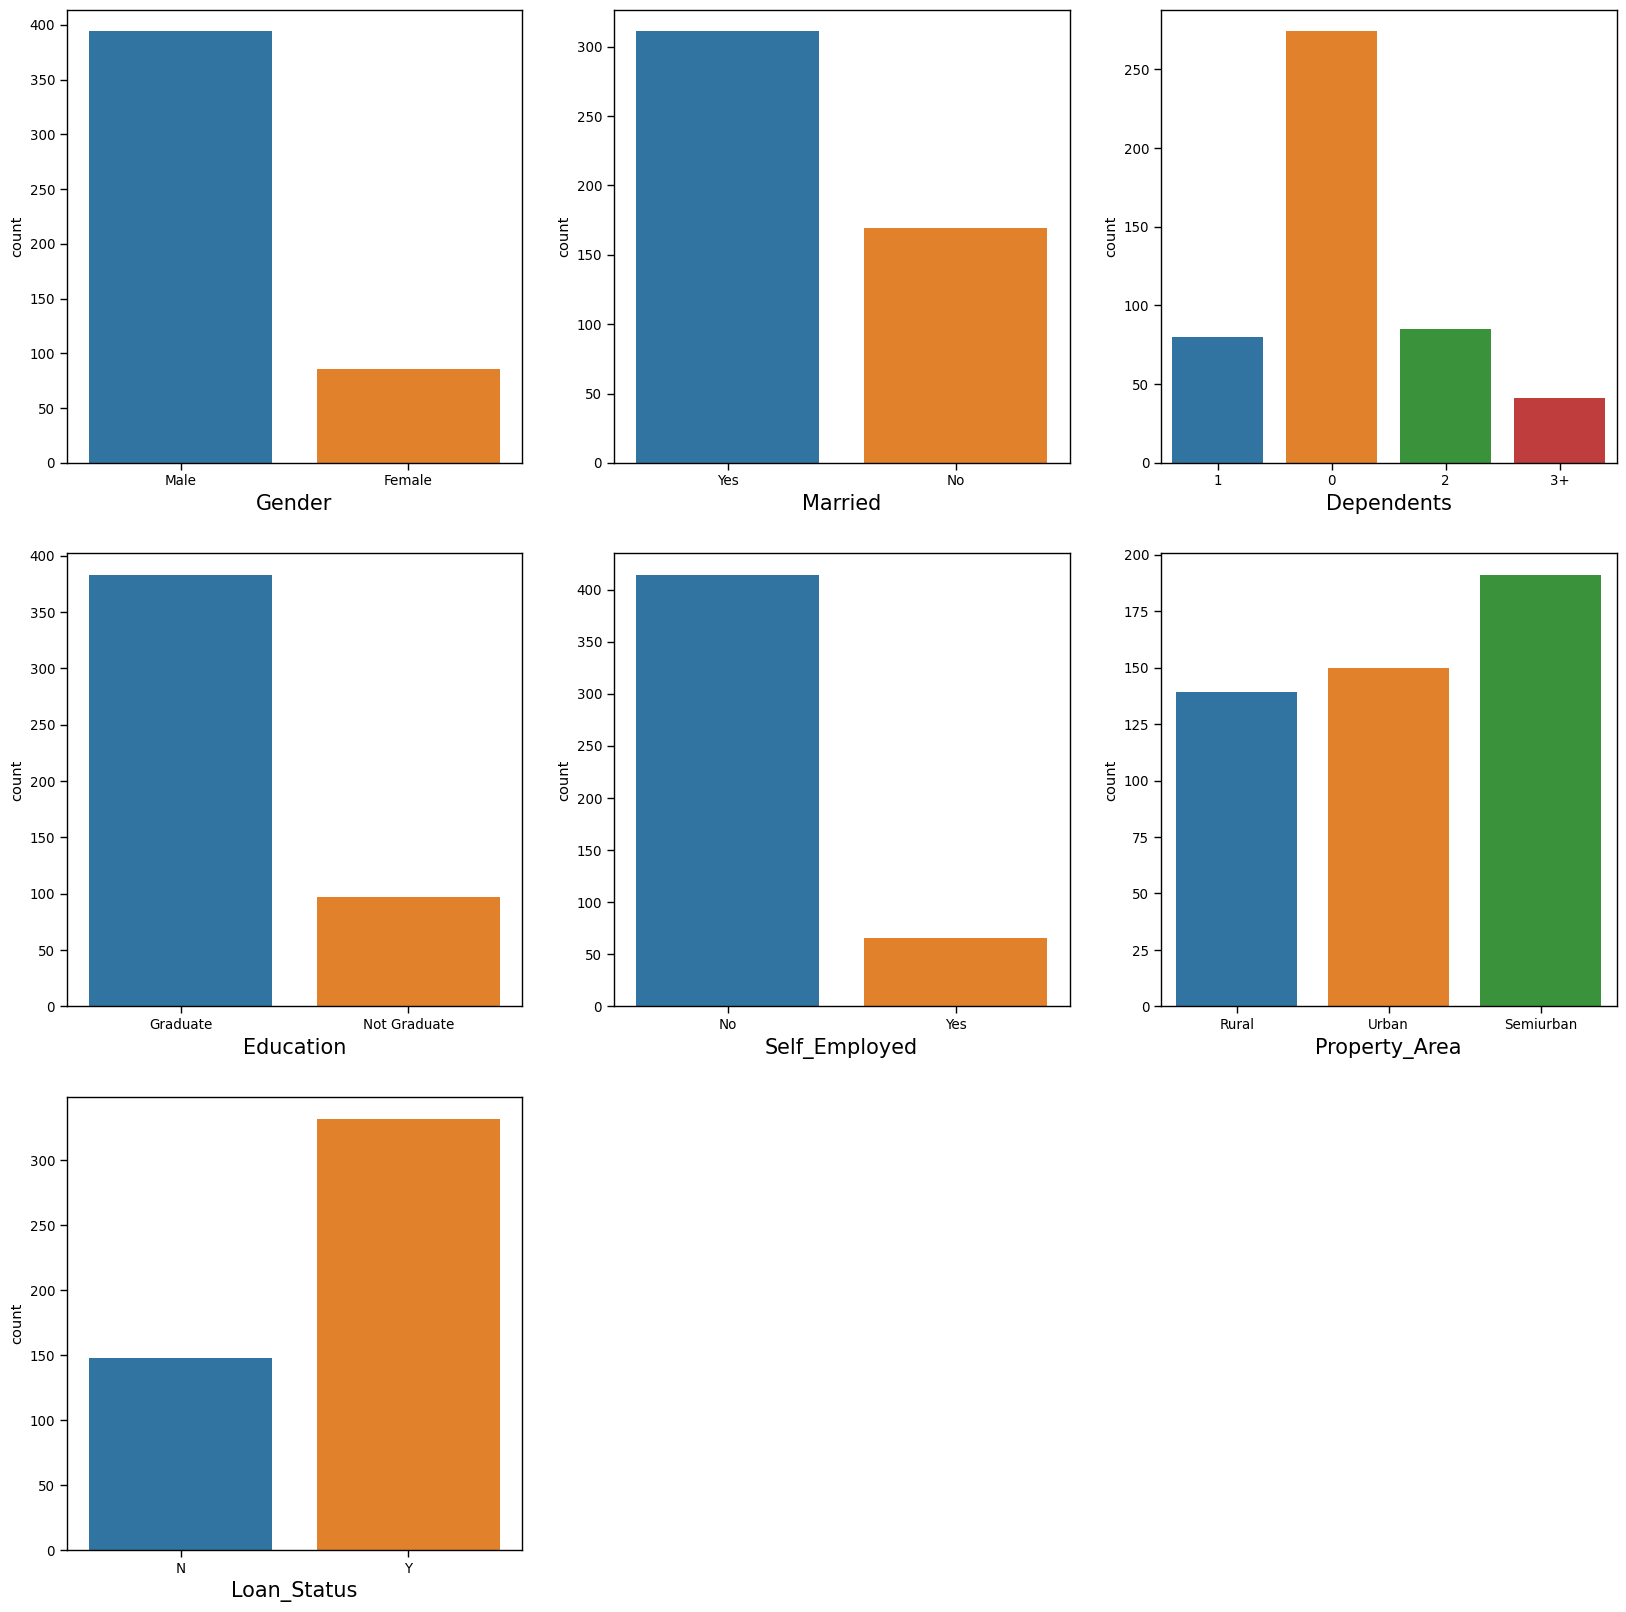

In [164]:
#it shows the graph between all the categorical columns
plt.figure(figsize=(20,20))
plotnumber = 1

for column in Categorical:
  if plotnumber <= 10:
    ax = plt.subplot(3,3,plotnumber)
    sns.countplot(x=column, data=Categorical)
    plt.xlabel(column,fontsize = 15)
  plotnumber+=1
plt.show()

2.Numerical Columns

In [165]:
num_col = [clm for clm in loan_dataset.columns if loan_dataset[clm].dtype !="O"]
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [166]:
loan_dataset[num_col].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508,128,360,1
2,3000,0,66,360,1
3,2583,2358,120,360,1
4,6000,0,141,360,1
5,5417,4196,267,360,1


In [167]:
loan_dataset[num_col].shape

(480, 5)

In [168]:
loan_dataset[num_col].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [169]:
Numerical_col =loan_dataset[num_col]
Numerical_col.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508,128,360,1
2,3000,0,66,360,1
3,2583,2358,120,360,1
4,6000,0,141,360,1
5,5417,4196,267,360,1


In [170]:
def kdeplot(param, x_title):
    
    sns.set_context("paper",font_scale=1.1)
    ax = sns.kdeplot(param[(loan_dataset["Loan_Status"] == 'N') ],
                color="Red", shade = True);
    ax = sns.kdeplot(param[(loan_dataset["Loan_Status"] == 'Y') ],
                ax =ax, color="Blue", shade= True);
    ax.legend(["Not Approved","Approved"],loc='upper right');
    ax.set_ylabel('Density');
    ax.set_xlabel(x_title);
    ax.set_title("Distribution of " + x_title +" by loan approval status");

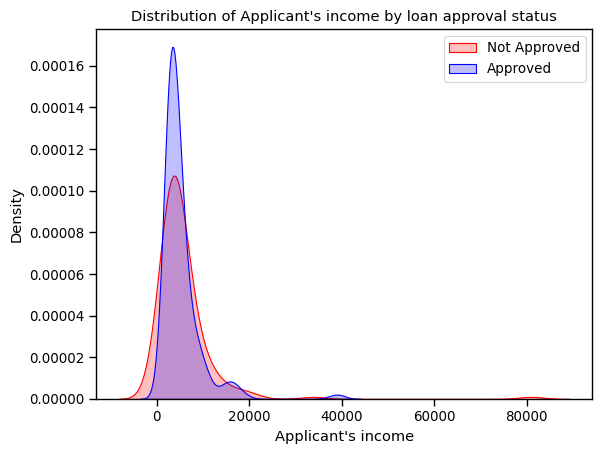

In [171]:
kdeplot(loan_dataset.ApplicantIncome, "Applicant's income")

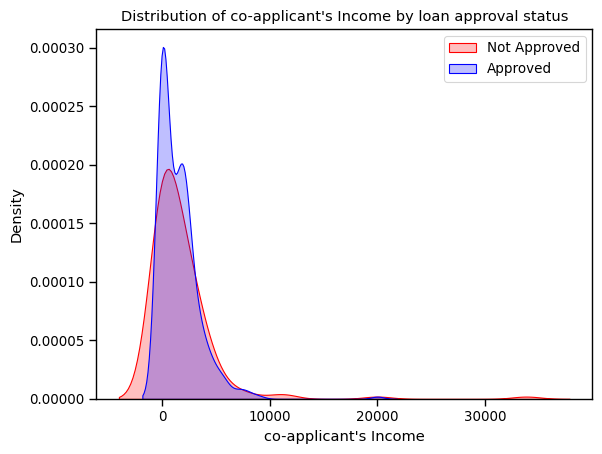

In [172]:
kdeplot(loan_dataset.CoapplicantIncome, "co-applicant's Income")

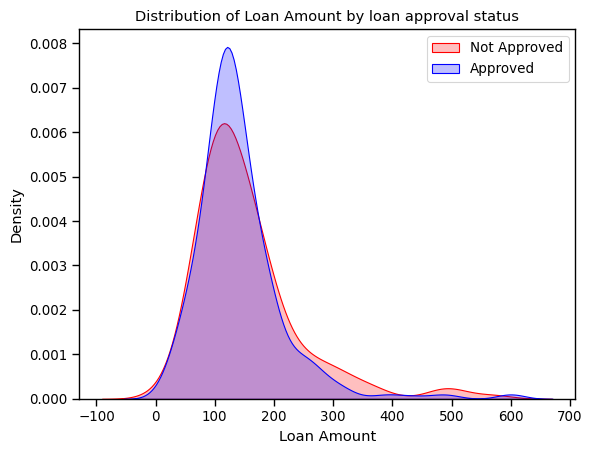

In [173]:
kdeplot(loan_dataset.LoanAmount, "Loan Amount")

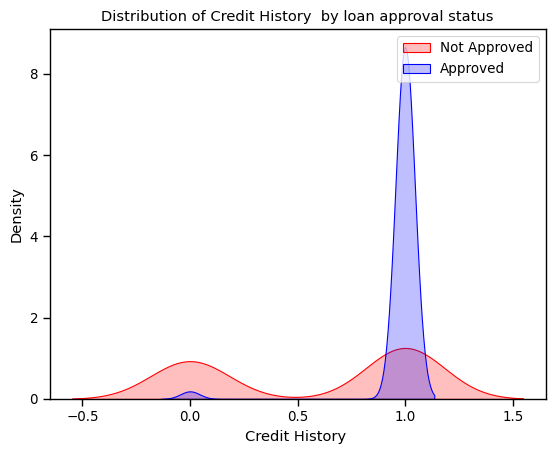

In [174]:
kdeplot(loan_dataset.Credit_History , "Credit History ")

In [175]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


Handling Categorical Columns

In [176]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

#replacing the value of 3+ to 4

In [177]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

dependent values 

In [178]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [179]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [180]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508,128,360,1,0,N
2,1,1,0,1,1,3000,0,66,360,1,2,Y
3,1,1,0,0,0,2583,2358,120,360,1,2,Y
4,1,0,0,1,0,6000,0,141,360,1,2,Y
5,1,1,2,1,1,5417,4196,267,360,1,2,Y


In [181]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [182]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [183]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [184]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine Model

In [185]:
classifier = svm.SVC(kernel='linear')

In [186]:
#training the support Vector Machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [187]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [188]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7939814814814815


In [189]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [190]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


Save the Model

In [191]:
from joblib import dump, load

In [192]:
dump(classifier, 'svm_model.joblib')


['svm_model.joblib']

In [193]:
model = load('svm_model.joblib')

Predict a New System

In [198]:
import pandas as pd
new_data = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':0,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':2
},index=[0])

In [199]:
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,2889,0.0,45,180,0,2


Prediction of the Result

In [200]:
result = model.predict(new_data)

In [201]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved
